<h3>Object Detection Tutorial - Chapter 5 - Running Yolo</h3>

<h4>Initialization Routines</h4>
    
Series of routines that control interactive output and display of imported images

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# methods for displaying and maintaining an image in jupyter frontend
from IPython.display import Image, display

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

<h4>Key Libraries and Paths</h4>

In [5]:
# common libraries used with image libraries

from ultralytics import YOLO
import cv2
import os
import numpy as np

# Matplotlib is image and data visualization library
# matplotlib.pyplot is a module in Matplotlib
# and PyLab is a module that gets installed alongside Matplotlib.

from matplotlib import pyplot as plt
import matplotlib.path as mpltPath
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# The name and path of the current working directory
cwd_path = os.getcwd()

In [7]:
# functions for displaying boxes and labels from yolo model
# called from the subsequent function - plot-bboxes

def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)
    p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
    if label:
        tf = max(lw - 1, 1)  # font thickness
        w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),\
                    0, lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

In [8]:
# function for displaying boxes

# image – your image in array numpy format
# boxes – your list of Bounding Boxes in the format [x1, y1, x2, y2, score, label] – 
#         if the score is not present indicate score=False
# labels – the labels are by default aligned with those of the COCO dataset, otherwise you can indicate your own
# colors – the colours corresponding to the labels
# score – if True, displays the score
# conf – the minimum confidence threshold (the score) required to display a bounding box

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
#Define COCO Labels
    if labels == []:
        labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car',\
                  4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', \
                  8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 
                  12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 
                  16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 
                  21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 
                  25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 
                  29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 
                  33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 
                  37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 
                  41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 
                  46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 
                  51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 
                  56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 
                  61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 
                  66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 
                  71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 
                  76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}
  
#Define colors
  
    if colors == []:
        
        colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),\
                  (167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),\
                  (204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),\
                  (101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),\
                  (73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),\
                  (12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),\
                  (7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),\
                  (0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),\
                  (8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),\
                  (155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),\
                  (95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),\
                  (30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),\
                  (232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),\
                  (55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),\
                  (100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),\
                  (171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),\
                  (17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]
  
    #plot each boxes
    for box in boxes:
        #add score in label if score=True
        if score :
            label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
        else :
            label = labels[int(box[-1])+1]
        #filter every box under conf threshold if conf threshold setted
        if conf :
            if box[-2] > conf:
                color = colors[int(box[-1])]
                box_label(image, box, label, color)
        else:
          color = colors[int(box[-1])]
          box_label(image, box, label, color)

    #show image
    print('shape of image:',image.shape, type(image))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #cv2.imshow('img_bus', image);
    plt.imshow(image)


In [9]:
cwd_path

'c:\\Jupyter_Files\\object_detection_tutorial\\Chapter 5 - Running Yolo'

In [10]:
img_file = cwd_path + '\\Images\\1.png' # bus
img_file

'c:\\Jupyter_Files\\object_detection_tutorial\\Chapter 5 - Running Yolo\\Images\\1.png'

<h3>Analysis for Image of Bus and Students</h3>

In [11]:
img_cv2 = cv2.imread(img_file)
print("Data type of img created by cv2 {}".format(type(img_cv2)))

Data type of img created by cv2 <class 'numpy.ndarray'>


In [12]:
# image features

img_cv2_height = img_cv2.shape[0] # number of rows
img_cv2_width = img_cv2.shape[1] # number of cols
img_cv2_channels = img_cv2.shape[2] # number of channels
tot_cv2_pixels = img_cv2_height * img_cv2_width

print("Shape of img_cv2 {}".format(img_cv2.shape))
print("Height of img_cv2: {} pixels".format(img_cv2_height))
print("Width of img_cv2: {} pixels".format(img_cv2_width))
print("Channels of img_cv2: {}".format(img_cv2_channels))
print("Total Pixels in img_cv2: {}".format(tot_cv2_pixels))

Shape of img_cv2 (1080, 1920, 3)
Height of img_cv2: 1080 pixels
Width of img_cv2: 1920 pixels
Channels of img_cv2: 3
Total Pixels in img_cv2: 2073600


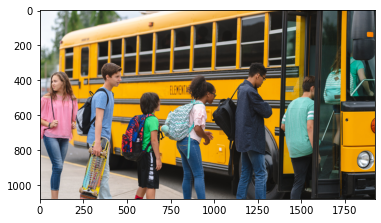

In [13]:
# convert from CV2 BGR image to numpy RGB image
img_bus = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(img_bus)

In [14]:
model = YOLO('../Yolo-Weights/yolov8l.pt')
results_1 = model(img_bus, show=True)

WARNING  Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.39  Python-3.7.3 torch-1.9.1 CPU
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

0: 384x640 7 persons, 1 bus, 3 backpacks, 3 handbags, 1 skateboard, 780.0ms
Speed: 1.0ms pre-process, 780.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [15]:
results_1

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([15, 6])
 dtype: torch.float32
  + tensor([[1.04000e+02, 1.00000e+00, 1.92000e+03, 1.06600e+03, 9.54105e-01, 5.00000e+00],
         [0.00000e+00, 3.49000e+02, 2.22000e+02, 1.07800e+03, 9.33109e-01, 0.00000e+00],
         [4.65000e+02, 5.92000e+02, 6.61000e+02, 8.65000e+02, 9.13873e-01, 2.40000e+01],
         [1.11400e+03, 3.00000e+02, 1.33200e+03, 1.07700e+03, 9.04243e-01, 0.00000e+00],
         [1.37900e+03, 3.74000e+02, 1.58000e+03, 1.07500e+03, 8.89950e-01, 0.00000e+00],
         [2.22000e+02, 7.32000e+02, 3.99000e+02, 1.07800e+03, 8.82901e-01, 3.60000e+01],
         [2.54000e+02, 3.00000e+02, 4.72000e+02, 1.07800e+03, 8.60827e-01, 0.00000e+00],
         [7.80000e+02, 3.73000e+02, 1.00800e+03, 1.07700e+03, 8.56755e-01, 0.00000e+00],
         [2.04000e+02, 4.49000e+02, 3.94000e+02, 7.19000e+02, 8.06467e-01, 2.40000e+01],
         [6.90000e+02, 5.19000e+02, 9.37000e

In [16]:
# individual elements of results
# results
print(f'Number of boxes: {len(results_1[0].boxes.cls)}')
print('Classifications:')
print(results_1[0].boxes.cls)
print('Confidences:')
print(results_1[0].boxes.conf)
print('Locations:')
print(results_1[0].boxes.xyxy)

Number of boxes: 15
Classifications:
tensor([ 5.,  0., 24.,  0.,  0., 36.,  0.,  0., 24., 24.,  0., 26., 26.,  0., 26.])
Confidences:
tensor([0.95411, 0.93311, 0.91387, 0.90424, 0.88995, 0.88290, 0.86083, 0.85676, 0.80647, 0.80437, 0.76625, 0.68350, 0.62640, 0.56449, 0.27366])
Locations:
tensor([[1.04000e+02, 1.00000e+00, 1.92000e+03, 1.06600e+03],
        [0.00000e+00, 3.49000e+02, 2.22000e+02, 1.07800e+03],
        [4.65000e+02, 5.92000e+02, 6.61000e+02, 8.65000e+02],
        [1.11400e+03, 3.00000e+02, 1.33200e+03, 1.07700e+03],
        [1.37900e+03, 3.74000e+02, 1.58000e+03, 1.07500e+03],
        [2.22000e+02, 7.32000e+02, 3.99000e+02, 1.07800e+03],
        [2.54000e+02, 3.00000e+02, 4.72000e+02, 1.07800e+03],
        [7.80000e+02, 3.73000e+02, 1.00800e+03, 1.07700e+03],
        [2.04000e+02, 4.49000e+02, 3.94000e+02, 7.19000e+02],
        [6.90000e+02, 5.19000e+02, 9.37000e+02, 7.50000e+02],
        [5.19000e+02, 4.68000e+02, 7.05000e+02, 1.07800e+03],
        [9.85000e+02, 4.16000

shape of image: (1080, 1920, 3) <class 'numpy.ndarray'>


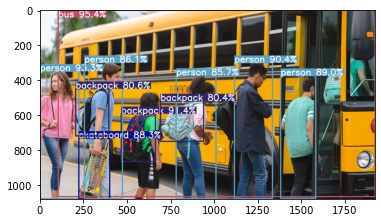

In [17]:
#plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None)
plot_bboxes(img_bus, results_1[0].boxes.boxes, conf=0.8)

<h4>Analysis for Image of Cars</h4>

In [18]:
# reading img_cars <- 2.png
img_file = cwd_path + '\\Images\\2.png' # cars
img_cv2 = cv2.imread(img_file)
img_cv2_height = img_cv2.shape[0] # number of rows
img_cv2_width = img_cv2.shape[1] # number of cols
img_cv2_channels = img_cv2.shape[2] # number of channels
tot_cv2_pixels = img_cv2_height * img_cv2_width

print("Shape of img_cv2 {}".format(img_cv2.shape))
print("Height of img_cv2: {} pixels".format(img_cv2_height))
print("Width of img_cv2: {} pixels".format(img_cv2_width))
print("Channels of img_cv2: {}".format(img_cv2_channels))
print("Total Pixels in img_cv2: {}".format(tot_cv2_pixels))

Shape of img_cv2 (675, 1200, 3)
Height of img_cv2: 675 pixels
Width of img_cv2: 1200 pixels
Channels of img_cv2: 3
Total Pixels in img_cv2: 810000


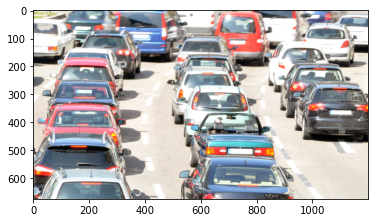

In [19]:
# displaying img_cars -> 2.png
img_cars = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) 
plt.imshow(img_cars);

In [20]:
# label cars
model = YOLO('../Yolo-Weights/yolov8l.pt')
results_2 = []
results_2 = model(img_cars, show=True)

WARNING  Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.39  Python-3.7.3 torch-1.9.1 CPU
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

0: 384x640 21 cars, 1 truck, 826.0ms
Speed: 0.0ms pre-process, 826.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [21]:
# results
print(f'Number of boxes: {len(results_2[0].boxes.cls)}')
print('Classifications:')
print(results_2[0].boxes.cls)
print('Confidences:')
print(results_2[0].boxes.conf)
print('Locations:')
print(results_2[0].boxes.xyxy)

Number of boxes: 22
Classifications:
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 7., 2., 2., 2., 2., 2., 2.])
Confidences:
tensor([0.93272, 0.91269, 0.90303, 0.90106, 0.89614, 0.88830, 0.88730, 0.88601, 0.88014, 0.84875, 0.84751, 0.83593, 0.83182, 0.82173, 0.78097, 0.73649, 0.66056, 0.63266, 0.59722, 0.59577, 0.58678, 0.36594])
Locations:
tensor([[9.32000e+02, 2.53000e+02, 1.20000e+03, 4.70000e+02],
        [4.79000e+02, 2.00000e+02, 7.26000e+02, 4.08000e+02],
        [5.35000e+02, 2.67000e+02, 7.98000e+02, 4.87000e+02],
        [5.23000e+02, 5.19000e+02, 9.36000e+02, 6.73000e+02],
        [6.50000e+02, 4.00000e+00, 8.58000e+02, 2.01000e+02],
        [8.32000e+02, 1.10000e+02, 1.06800e+03, 2.93000e+02],
        [5.59000e+02, 3.66000e+02, 8.68000e+02, 5.62000e+02],
        [9.64000e+02, 4.40000e+01, 1.16200e+03, 2.02000e+02],
        [8.81000e+02, 1.86000e+02, 1.13800e+03, 3.85000e+02],
        [0.00000e+00, 2.50000e+01, 1.57000e+02, 1.78000e+02],
        [0.0000

shape of image: (675, 1200, 3) <class 'numpy.ndarray'>


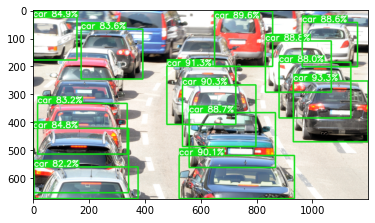

In [22]:
plot_bboxes(img_cars, results_2[0].boxes.boxes, conf=0.8)

<h4>Analysis for Image of Motorcycles, Cars and People</h4>

In [23]:
# reading image - 3.png 
img_file = cwd_path + '\\Images\\3.png' # cycles
img_cv2 = cv2.imread(img_file)
img_cv2_height = img_cv2.shape[0] # number of rows
img_cv2_width = img_cv2.shape[1] # number of cols
img_cv2_channels = img_cv2.shape[2] # number of channels
tot_cv2_pixels = img_cv2_height * img_cv2_width

print("Shape of img_cv2 {}".format(img_cv2.shape))
print("Height of img_cv2: {} pixels".format(img_cv2_height))
print("Width of img_cv2: {} pixels".format(img_cv2_width))
print("Channels of img_cv2: {}".format(img_cv2_channels))
print("Total Pixels in img_cv2: {}".format(tot_cv2_pixels))

Shape of img_cv2 (675, 1200, 3)
Height of img_cv2: 675 pixels
Width of img_cv2: 1200 pixels
Channels of img_cv2: 3
Total Pixels in img_cv2: 810000


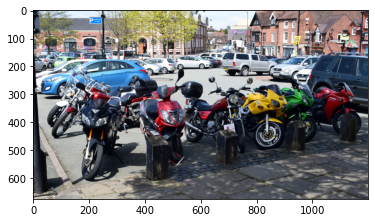

In [24]:
# displaying img_cars -> 2.png
img_cycles = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) 
plt.imshow(img_cycles);

In [25]:
# label cycles, cars, and trucks
model = YOLO('../Yolo-Weights/yolov8l.pt')
results_3 = model(img_cycles, show=True)

WARNING  Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.39  Python-3.7.3 torch-1.9.1 CPU
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

0: 384x640 16 cars, 10 motorcycles, 1 bus, 781.0ms
Speed: 1.0ms pre-process, 781.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [26]:
# results
print(f'Number of boxes: {len(results_3[0].boxes.cls)}')
print('Classifications:')
print(results_3[0].boxes.cls)
print('Confidences:')
print(results_3[0].boxes.conf)
print('Locations:')
print(results_3[0].boxes.xyxy)

Number of boxes: 27
Classifications:
tensor([3., 3., 2., 3., 2., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2., 2., 3., 5., 3., 2., 2.])
Confidences:
tensor([0.90508, 0.90011, 0.88469, 0.88304, 0.86384, 0.85990, 0.84625, 0.82062, 0.81941, 0.78803, 0.78567, 0.78132, 0.75503, 0.72803, 0.72358, 0.64116, 0.62510, 0.61536, 0.51417, 0.49247, 0.44006, 0.39377, 0.38364, 0.37703, 0.31239, 0.28290, 0.25287])
Locations:
tensor([[ 992.,  257., 1178.,  445.],
        [ 535.,  236.,  788.,  511.],
        [ 510.,  161.,  643.,  212.],
        [ 743.,  264.,  914.,  499.],
        [ 852.,  161., 1030.,  252.],
        [ 980.,  152., 1199.,  353.],
        [  18.,  175.,  419.,  309.],
        [ 365.,  208.,  551.,  556.],
        [ 404.,  171.,  514.,  228.],
        [ 150.,  198.,  350.,  608.],
        [  50.,  196.,  185.,  416.],
        [ 335.,  173.,  465.,  232.],
        [   5.,  163.,   51.,  221.],
        [  16.,  159.,   88.,  208.],
        [ 597.,  165.,  677.,  206.],


shape of image: (675, 1200, 3) <class 'numpy.ndarray'>


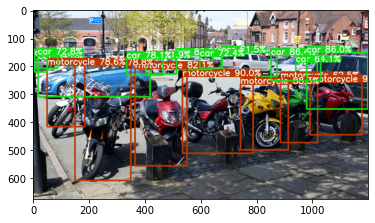

In [29]:
plot_bboxes(img_cycles, results_3[0].boxes.boxes, conf=0.7)